
# Logistic Regression with Python

We'll be trying to predict a classification- survival or deceased.Let's begin our understanding of implementing Logistic Regression in Python for classification.

## Import Libraries
Let's import some libraries to get started!

https://www.kaggle.com/fatmakursun/titanic-classification-regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

## The Data


In [2]:
train = pd.read_csv('Data/train.csv')

In [3]:
train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

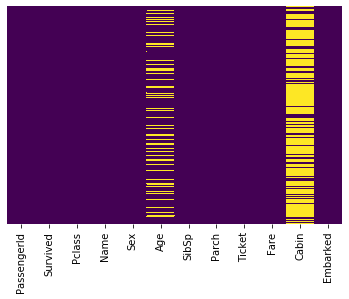

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

#### Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

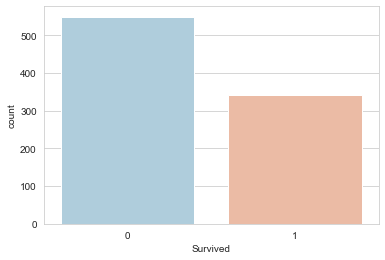

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

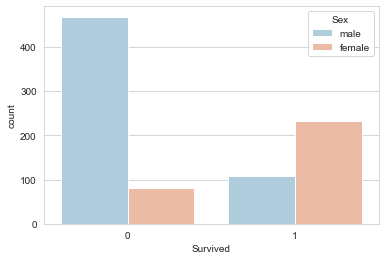

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

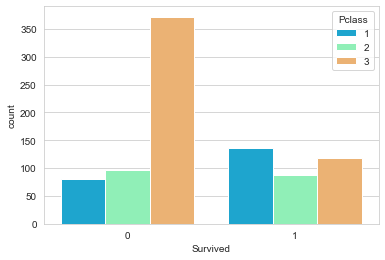

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

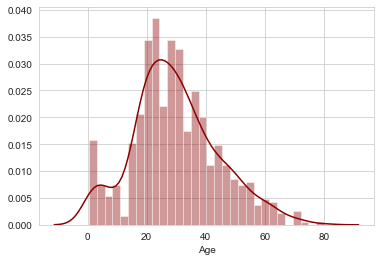

In [25]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=30)

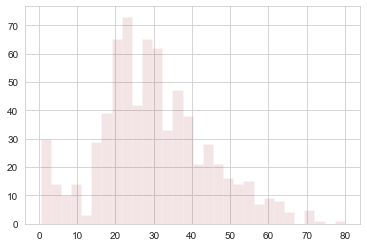

In [22]:
train['Age'].hist(bins=30,color='darkred',alpha=0.1)

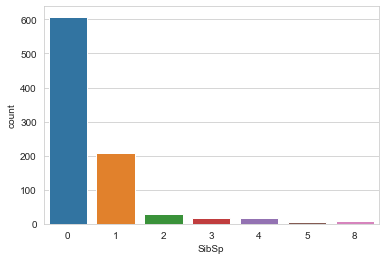

In [23]:
sns.countplot(x='SibSp',data=train)

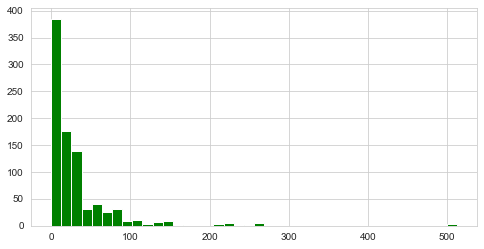

In [11]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


In [26]:
train['Age'].median()

28.0

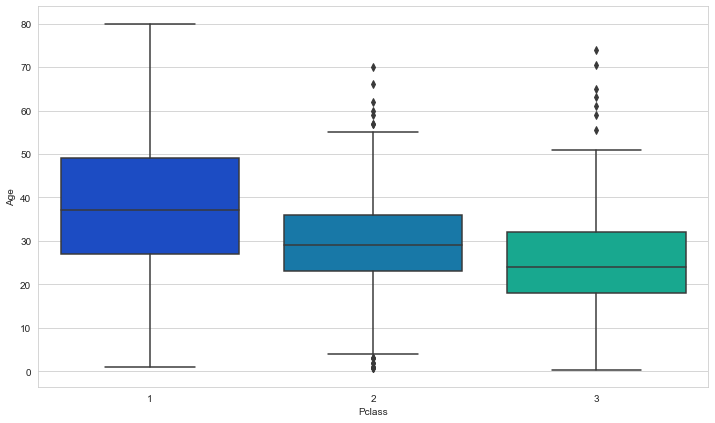

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [3]:
#cols = [14, 2]
#cols = [Nan, 2]
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [4]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [5]:
train['Age'].isnull().sum()

0

Now let's check that heat map again!

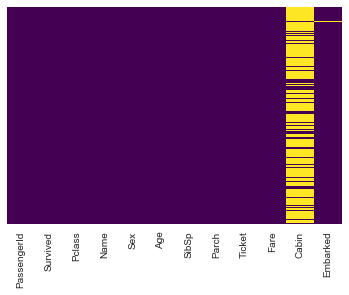

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [6]:
train.drop('Cabin',axis=1,inplace=True)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
train.dropna(inplace=True)

## Converting Categorical Features 
  We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [9]:
sex = pd.get_dummies(train['Sex'],drop_first=True, prefix='sex_')
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [10]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [11]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [50]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [12]:
train = pd.concat([train,sex,embark],axis=1)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex__male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   sex__male    889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


### Great! Our data is ready for our model!

## Building a Logistic Regression model
 Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
predictors = [var for var in train if var not in ['PassengerId', 'Survived']]
predictors

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex__male', 'Q', 'S']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.20, 
                                                    stratify=train['Survived'],
                                                    random_state=100)

In [17]:
y_train.mean()

0.38255977496483823

In [18]:
y_test.mean()

0.38202247191011235

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex__male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Training and Predicting

In [19]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logmodel_l1.fit(X_train[predictors],y_train)

#C = 1/lambda

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
logmodel_l2 = LogisticRegression()
logmodel_l2.fit(X_train[predictors],y_train)

/Users/dennis/virtualenvs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
logmodel_l2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
logmodel_l2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
predictors

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex__male', 'Q', 'S']

In [27]:
#l2
logmodel_l2.coef_[0]

array([-1.1077777 , -0.04444881, -0.39403166, -0.04273581,  0.00276924,
       -2.55148624,  0.22856629, -0.36706642])

In [30]:
#l1
logmodel_l1.coef_[0]

array([-1.05408421, -0.04041249, -0.36724973, -0.04925222,  0.00293614,
       -2.61404189,  0.        , -0.40313857])

In [35]:
list(zip(predictors, logmodel_l2.coef_[0]))

[('Pclass', -1.1077777044119705),
 ('Age', -0.0444488056423552),
 ('SibSp', -0.3940316588494198),
 ('Parch', -0.04273581192356636),
 ('Fare', 0.00276923752564565),
 ('sex__male', -2.5514862393973154),
 ('Q', 0.2285662906989345),
 ('S', -0.3670664191712056)]

Pclass   -1.107778
Age      -0.044449
SibSp    -0.394032
Parch    -0.042736
Fare      0.002769
dtype: float64


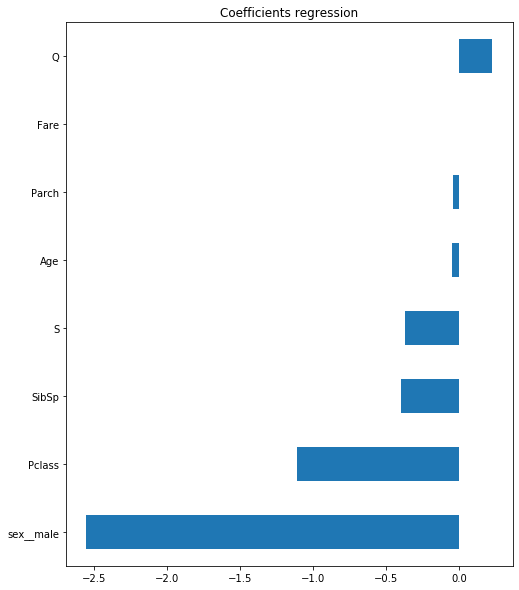

In [34]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

coef = pd.Series(logmodel_l2.coef_[0], index = predictors)
print(coef.head())

imp_coef = pd.concat([coef.sort_values()])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients regression")

var_impor = imp_coef.index
var_impor = list(var_impor)

# Interpretando los resultados (Odd y Odd Ratio)

Fuente: http://networkianos.com/odd-ratio-que-es-como-se-interpreta/ (Julián Cárdenas)



## 1. La probabilidad de un fenómeno

Si tenemos 1000 personas y 3 partidos para las siguientes elecciones (Conservadores, Liberales, Socialistas). Sabemos que 350 personas votaron al partido Liberal.

1. Probabilidad de votar al partido liberalista = (350/1000 = 0.35)
2. Probabilidad de no votar al partido liberalista = 1 - 0.35 = 0.65

Pregunta 1:
**Si seleccionamos a una persona aleatoria ¿Es más probable que haya votado al partido liberalista o no?**

## 2. Un odd

El odd **es la probabilidad de que suceda un evento dividido por la probabilidad de que no suceda**

Entonces:

1. El odd de sí votar al partido liberal es 0.35/0.65 = 0.53
2. El odd de no votar al partido liberal es de 0.65/0.35 = 1.86

Esto se interpreta: Segun los resultados podemos decir que es 1,86 veces más probable que alguien no sea liberal a que lo sea. **Los odds se interpretan como ratios es decir, la cantidad de veces que algo pueda suceder sobre que no pueda suceder.**


## 3. Un odd ratio

El odd ratio es una medida de asociación entre dos variables que indica la fortaleza de relación entre dos variables.
¿Qué tan probable es votar al partido liberal teniendo en cuenta si las personas creen en Dios o no?. Para calcular el odd ratio de estas dos variables es el odd de sí-votar al partido liberal cuando crees en Dios entre el odd de sí votar al partido liberal cuando no crees en Dios.

Ejemplo:

Variable 1: Votar al partido liberal (1:Si vota 0: No vota)
Variable 2: Creer en Dios (1:Si cree en Dios 0: No cree en Dios)

Resultados de relacionar las variables

<img src="Images/odd-ratio-ejemplo.png" alt="New app" title="New app" width=250px height=300px/>

Necesitamos calcular el odd de si votar al partido liberal cuando crees en Dios dividido por el odd de si votar al partido cuando no crees en Dios.

### Para los que sí creen en Dios

1. La probabilidad de si votar al partido liberal y creer en Dios es 100/400 = 0,25
2. La probabilidad de no votar al partido liberal y creer en Dios es 300/400 = 0.75

El odd de si votar al partido liberal para los creyentes en Dios es 0,25/0.75 = 0.33


### Para los que no creen en Dios

1. La probabilidad de sí-votar al partido liberal y no creer en Dios es 250 / 600 = 0,42
2. La probabilidad de no-votar al partido liberal y no cree en Dios es 350 / 600 = 0,58

El odd de sí-votar al partido liberal para los no-creyentes en Dios es 0,42 / 0,58 = 0,72

**El cálculo del odd ratio**

Por lo tanto el odd ratio entre votar a los liberales y creer en Dios es de 0,33/0,72 = 0,46
(100x350)/(250x300)

#### Interpretación

- Los odd ratio oscilan entre 0 e infinito.
- Cuando el odd ratio es 1 indica ausencia de asociación entre las variables.
- Los valores menores de 1 señalan una asociación negativa entre las variables y los valores mayores de 1 indican asociación positiva entre las variables.
- Cuanto más se aleje el odd ratio de 1, más fuerte es la relación.
- En nuestro ejemplo, el odd ratio es menos de 1 (odd ratio de sí-votar al partido liberal y creer en Dios = 0,46), y se interpreta diciendo que los sí creen en Dios tienen menos probabilidad de votar al partido liberal. O también podemos decir que los que no creen en Dios tienen más probabilidad de votar al partido liberal.
- Cuando el odd ratio es menor de 1 es conveniente calcular la inversa, es decir, 1 / 0,46 = 2,17. De esta manera podemos expresar mejor la fortaleza de la relación. Recordemos que cuanto más alejado de 1, más fuerte es la asociación entre las maneras. Así, para una persona que no cree en Dios los odds de votar al partido liberal son 2,17 veces más grandes que los odds de una persona que sí cree en Dios de votar liberal.


### Odds Ratio y la regresión Lógista

Para saber si las variables independientes están relacionadas con la variable dependiente se calculan primero los coeficientes beta. Estos beta se pueden expresentar mediante los odds ratio, para esto se eleva el número exponencial "e" al coeficiente b. 

Se hace esto ya que son medidas estandarizadas que permiten comparar el nivel de influencia de la variable independiente sobre la variable dependiente.

In [38]:
coef = pd.Series(logmodel_l1.coef_[0], index = predictors)
coef = np.exp(coef)
coef

Pclass       0.348511
Age          0.960393
SibSp        0.692637
Parch        0.951941
Fare         1.002940
sex__male    0.073238
Q            1.000000
S            0.668219
dtype: float64

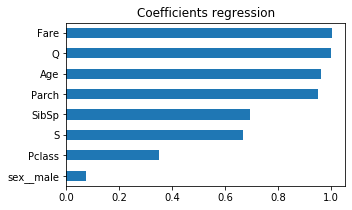

In [40]:
coef = pd.Series(logmodel_l1.coef_[0], index = predictors)
coef = np.exp(coef)

coef.head()

imp_coef = pd.concat([coef.sort_values()])
matplotlib.rcParams['figure.figsize'] = (5.0, 3.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients regression")

var_impor = imp_coef.index
var_impor = list(var_impor)

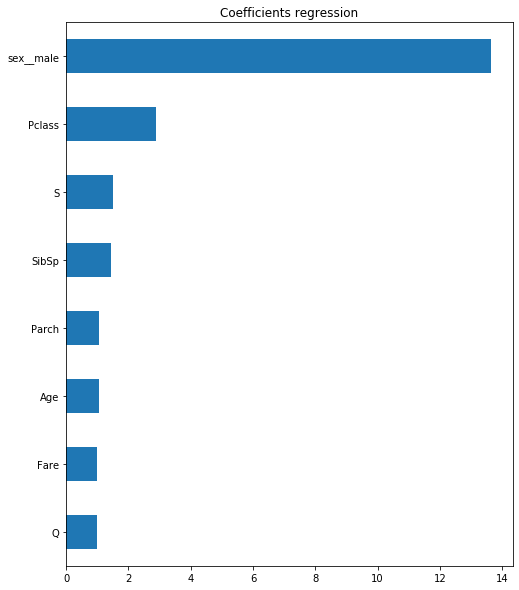

In [41]:
coef = np.where(coef <1, 1/coef, coef)
coef = pd.Series(coef, index = predictors)

coef.head()

imp_coef = pd.concat([coef.sort_values()])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients regression")

var_impor = imp_coef.index
var_impor = list(var_impor)

In [41]:
train[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.123784
Fare,0.123784,1.000000


In [42]:
predictions = logmodel_l1.predict(X_test[predictors])
X_test[predictors].head()

,Pclass,Age,SibSp,Parch,Fare,sex__male,Q,S
811,3,39.0,0,0,24.1500,1,0,1
514,3,24.0,0,0,7.4958,1,0,1
786,3,18.0,0,0,7.4958,0,0,1
591,1,52.0,1,0,78.2667,0,0,0
561,3,40.0,0,0,7.8958,1,0,1


In [43]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0])

In [44]:
predictions_prob = logmodel_l1.predict_proba(X_test[predictors])

In [45]:
predictions_prob

array([[0.93063653, 0.06936347],
       [0.88485384, 0.11514616],
       [0.30633781, 0.69366219],
       [0.14244582, 0.85755418],
       [0.93611451, 0.06388549],
       [0.69155928, 0.30844072],
       [0.5167534 , 0.4832466 ],
       [0.25143168, 0.74856832],
       [0.39874746, 0.60125254],
       [0.18801421, 0.81198579],
       [0.49618648, 0.50381352],
       [0.27198365, 0.72801635],
       [0.73290023, 0.26709977],
       [0.88468794, 0.11531206],
       [0.23318727, 0.76681273],
       [0.34112049, 0.65887951],
       [0.80291287, 0.19708713],
       [0.9453765 , 0.0546235 ],
       [0.88476406, 0.11523594],
       [0.61076246, 0.38923754],
       [0.09335468, 0.90664532],
       [0.51111657, 0.48888343],
       [0.78027137, 0.21972863],
       [0.05447276, 0.94552724],
       [0.74537707, 0.25462293],
       [0.90338781, 0.09661219],
       [0.21733062, 0.78266938],
       [0.82265874, 0.17734126],
       [0.7628386 , 0.2371614 ],
       [0.69951842, 0.30048158],
       [0.

In [53]:
predictions

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0])

### Interpretando la Regresion y sus coeficientes

<img src="Images/data_emailing.png" alt="New app" title="New app" width=800px height=500px/>

In [1]:
import pandas
import statsmodels.api as sm
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
  
#Read from google drive. This is the same dataset described in the previous section
data = pandas.read_csv('https://drive.google.com/uc?export=download&id=1PXjbqSMu__d_ppEv92i_Gnx3kKgfvhFk')
  
#Before building the regression, we need to know which ones are the reference levels for the categorical variables
#only keep categorical variables
data_categorical = data.select_dtypes(['object']).astype("category") 
#find reference level, i.e. the first level
print(data_categorical.apply(lambda x: x.cat.categories[0]))

email_text       long_email
email_version       generic
weekday              Friday
user_country             ES
dtype: object


In [2]:
#make dummy variables from categorical ones. Using one-hot encoding and drop_first=True 
data = pandas.get_dummies(data, drop_first=True)
  
#add intercept
data['intercept'] = 1
#drop the label
train_cols = data.drop('clicked', axis=1)
  
#Build Logistic Regression
logit = sm.Logit(data['clicked'], train_cols)
output = logit.fit()

Optimization terminated successfully.
         Current function value: 0.092770
         Iterations 9


In [3]:
output_table = pandas.DataFrame(dict(coefficients = output.params, SE = output.bse, z = output.tvalues, p_values = output.pvalues))
#get coefficients and pvalues
print(output_table)

                            coefficients            SE          z       p_values
email_id                   -3.848609e-08  7.780379e-08  -0.494656   6.208432e-01
hour                        1.670684e-02  5.005879e-03   3.337445   8.455247e-04
user_past_purchases         1.878107e-01  5.725787e-03  32.800855  5.725039e-236
email_text_short_email      2.793085e-01  4.530477e-02   6.165101   7.043829e-10
email_version_personalized  6.387251e-01  4.691461e-02  13.614631   3.277989e-42
weekday_Monday              5.410326e-01  9.341014e-02   5.792011   6.954864e-09
weekday_Saturday            2.828638e-01  9.777629e-02   2.892969   3.816190e-03
weekday_Sunday              1.836278e-01  1.001194e-01   1.834088   6.664099e-02
weekday_Thursday            6.254040e-01  9.233999e-02   6.772839   1.262790e-11
weekday_Tuesday             6.162222e-01  9.237223e-02   6.671077   2.539336e-11
weekday_Wednesday           7.554637e-01  9.084515e-02   8.315950   9.102053e-17
user_country_FR            -

In [4]:
#only keep significant variables and order results by coefficient value
print(output_table.loc[output_table['p_values'] < 0.05].sort_values("coefficients", ascending=False))

                            coefficients        SE          z       p_values
user_country_UK                 1.155255  0.122060   9.464618   2.946372e-21
user_country_US                 1.141360  0.115963   9.842487   7.386228e-23
weekday_Wednesday               0.755464  0.090845   8.315950   9.102053e-17
email_version_personalized      0.638725  0.046915  13.614631   3.277989e-42
weekday_Thursday                0.625404  0.092340   6.772839   1.262790e-11
weekday_Tuesday                 0.616222  0.092372   6.671077   2.539336e-11
weekday_Monday                  0.541033  0.093410   5.792011   6.954864e-09
weekday_Saturday                0.282864  0.097776   2.892969   3.816190e-03
email_text_short_email          0.279308  0.045305   6.165101   7.043829e-10
user_past_purchases             0.187811  0.005726  32.800855  5.725039e-236
hour                            0.016707  0.005006   3.337445   8.455247e-04
intercept                      -6.880922  0.156067 -44.089646   0.000000e+00

## Evaluation

We can check precision,recall,f1-score using classification report!

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test,predictions))

[[92 18]
 [21 47]]


In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.72      0.69      0.71        68

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.77       178
weighted avg       0.78      0.78      0.78       178



# Decision Tree Classifiction

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
dt_pred = dt_model.predict(X_test)

In [53]:
print(confusion_matrix(y_test,dt_pred))

[[90 20]
 [17 51]]


In [54]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.73        68

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



# Random Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf= RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
rf_pre=rf.predict(X_test)

In [58]:
print(confusion_matrix(y_test,rf_pre))

[[96 14]
 [19 49]]


In [58]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        68

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# Testing with all algorithms

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [61]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()
clf_mnb = MultinomialNB()
clf_gnb = GaussianNB()

In [62]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree',
               'LogisticRegression','SVM', 'MultiNB', 'GaussianNB']
scores_mean = []
scores_sd = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_lr, clf_svm, clf_mnb, clf_gnb]
for model in models:
    scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1)
    mean_scores = scores.mean()
    sd_scores = scores.std()
    scores_mean.append(mean_scores)
    scores_sd.append(sd_scores)

In [63]:
mode = pd.DataFrame(scores_mean, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)
mode['std'] = scores_sd

In [64]:
mode

,score,std
RandomForest,0.826937,0.039572
ExtraTrees,0.821264,0.050629
Bagging,0.804519,0.036857
AdaBoost,0.804441,0.039287
LogisticRegression,0.795990,0.041517
GaussianNB,0.793134,0.038724
DecisionTree,0.748122,0.020753
MultiNB,0.662539,0.053839
SVM,0.644171,0.045320


In [69]:
iteraciones_C = np.arange(0, 10, 0.1)

In [65]:
parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0.1,'auto'],
                  'random_state':[0,7,16]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini']}

In [66]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 5, 
                        scoring = 'accuracy', n_jobs=-1)
    grid.fit(X_train,y_train)
    return grid.best_score_, grid.best_estimator_.get_params()

In [63]:
def imp_features(model, model_name, params):
    Model = model(**params)
    Model.fit(X_train,y_train)
    names = X_train.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

In [67]:
best_score_svm, best_params_svm = grid(clf_svm,parameters_svm)

In [68]:
print(best_score_svm, best_params_svm)

0.797449029843396 {'C': 0.9, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [65]:
best_score_rf, best_params_rf = grid(clf_rf,parameters_rf)

In [66]:
print(best_score_rf, best_params_rf)

0.8172067369250466 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'random_state': 1, 'verbose': 0, 'warm_start': False}


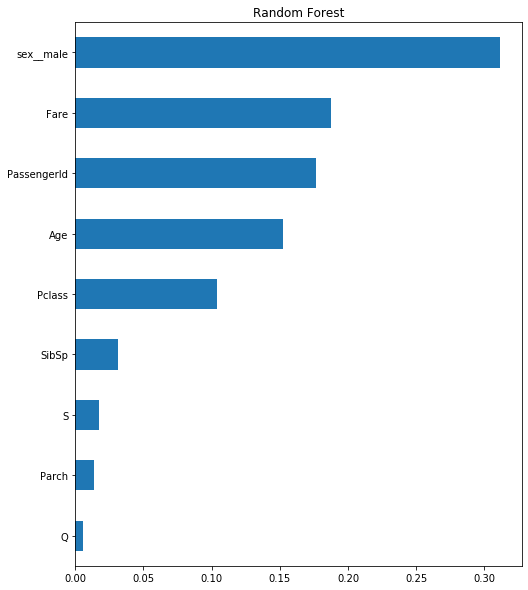

In [67]:
imp_features(RandomForestClassifier,'Random Forest', best_params_rf)

Now we will use test dataset

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
sns.heatmap(test.isnull())

In [ ]:
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [ ]:
test.info()

In [ ]:
test.head()

In [ ]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)

In [ ]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [ ]:
test.head()

In [ ]:
test_prediction = logmodel.predict(test[predictors])

In [ ]:
test_prediction.shape

In [ ]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [ ]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [ ]:
new_test.head()

In [ ]:
df= new_test[['PassengerId' ,'Survived']]

In [ ]:
df.to_csv('predictions_regresion.csv' , index=False)

## If you like it, please vote.
# Thank you :)